In [1]:
#imports
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, cross_val_predict,\
                                    train_test_split,\
                                    GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression,\
                            Ridge,Lasso,\
                            ElasticNetCV, ElasticNet
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('RegressionModelFile2018.csv')

In [3]:
df.shape

(64734, 10)

In [4]:
df.head()

,date,hour,member,count,day_of_week,holiday,season,description,avg_temp,time
0,2015-01-01,0.0,0,11,Thursday,1,winter,Clear,-1.0,midnight
1,2015-01-01,0.0,1,43,Thursday,1,winter,Clear,-1.0,midnight
2,2015-01-01,1.0,0,9,Thursday,1,winter,Clear,-1.0,midnight
3,2015-01-01,1.0,1,105,Thursday,1,winter,Clear,-1.0,midnight
4,2015-01-01,2.0,0,5,Thursday,1,winter,Clear,-1.0,midnight


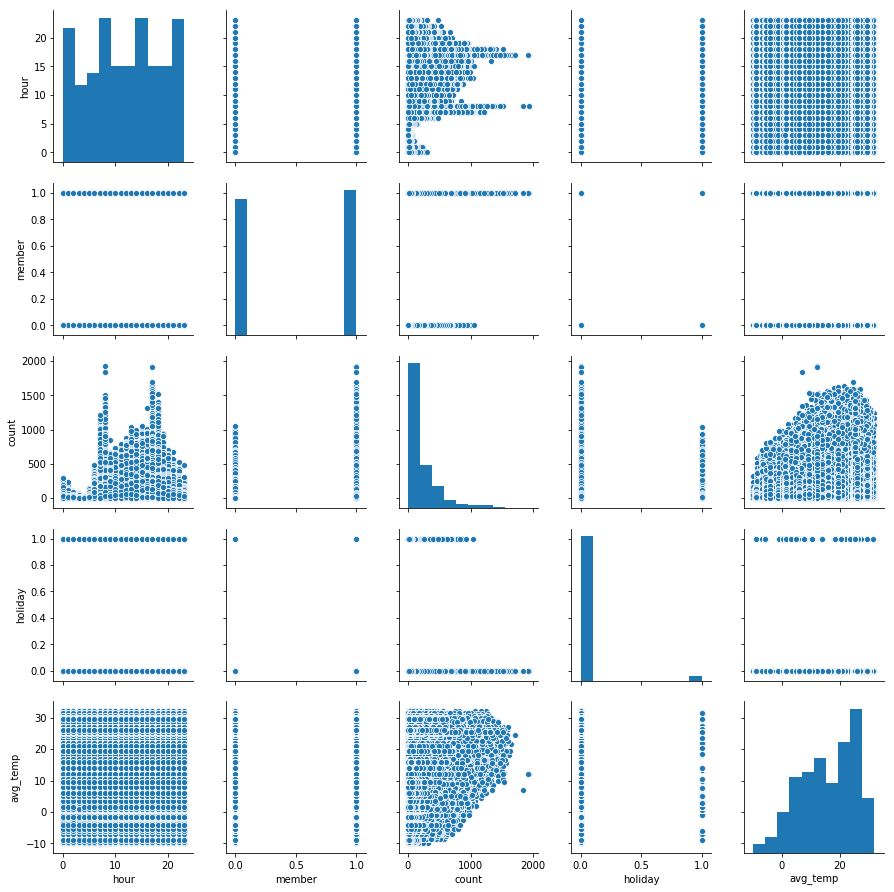

In [49]:
sns.pairplot(df)

In [5]:
df.time.value_counts()

midnight         12763
afternoon        11158
evening          11156
morning           8328
night             8318
early morning     7435
late morning      5576
Name: time, dtype: int64

In [56]:
df.corr()

,hour,member,count,holiday,avg_temp
hour,1.000000,-0.032081,0.254168,-0.002234,-0.028596
member,-0.032081,1.000000,0.404536,0.000994,-0.029253
count,0.254168,0.404536,1.000000,-0.041244,0.200667
holiday,-0.002234,0.000994,-0.041244,1.000000,-0.076713
avg_temp,-0.028596,-0.029253,0.200667,-0.076713,1.000000


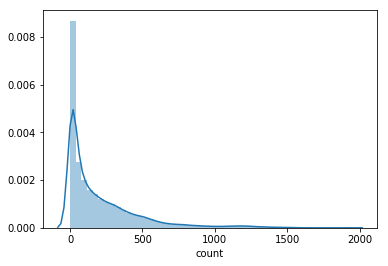

In [7]:
sns.distplot(df['count'])
#positively skewed y values

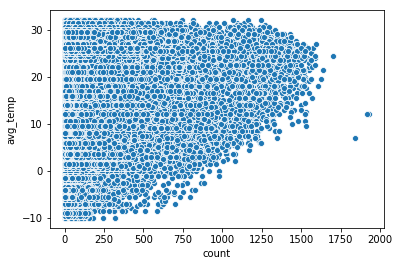

In [50]:
sns.scatterplot(df['count'],df['avg_temp'])

## Dummy columns

In [5]:
df = pd.get_dummies(columns =['day_of_week','season','description','time',],data=df)

In [6]:
df.head()

,date,hour,member,count,holiday,avg_temp,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,...,description_Rain,description_Snowfall,description_Thunderstorm,time_afternoon,time_early morning,time_evening,time_late morning,time_midnight,time_morning,time_night
0,2015-01-01,0.0,0,11,1,-1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2015-01-01,0.0,1,43,1,-1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2015-01-01,1.0,0,9,1,-1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2015-01-01,1.0,1,105,1,-1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2015-01-01,2.0,0,5,1,-1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
df.drop(['hour','date'], axis=1, inplace=True)

In [11]:
df.columns

Index(['member', 'count', 'holiday', 'avg_temp', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'season_autumn', 'season_spring', 'season_summer', 'season_winter',
       'description_Clear', 'description_Rain', 'description_Snowfall',
       'description_Thunderstorm', 'time_afternoon', 'time_early morning',
       'time_evening', 'time_late morning', 'time_midnight', 'time_morning',
       'time_night'],
      dtype='object')

### Simple Linear Regression model

In [7]:
X =df.drop(['count','hour','date'], axis=1)

In [8]:
y = np.log(df['count'].values)

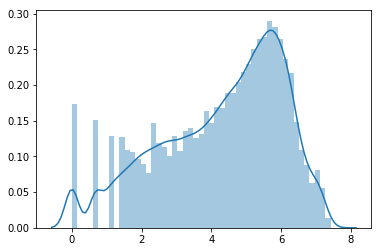

In [17]:
#y log values to get normal distribution
sns.distplot(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
print(X_train.shape,
      X_test.shape,
      y_train.shape,
      y_test.shape)

(43371, 25) (21363, 25) (43371,) (21363,)


In [14]:
lr = LinearRegression()

In [15]:
score = cross_val_score(lr, X_train, y_train, cv=10)

In [16]:
print('Linear Regression scores:', score)

Linear Regression scores: [0.69655678 0.68768424 0.70547504 0.69227569 0.69271054 0.690632
 0.68881368 0.67929194 0.68391387 0.69886374]


In [17]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
predictions = lr.predict(X_test)

In [19]:
print('Simple LR testing score:',
              lr.score(X_test, y_test))
print('Mean Squared error:', 
      np.sqrt(mean_squared_error(y_test, predictions)))

Simple LR testing score: 0.6938266850260646
Mean Squared error: 0.9830517335842336


In [20]:
print('LR training score:',lr.score(X_train, y_train))
print('Simple LR testing score:',
              lr.score(X_test, y_test))

LR training score: 0.691970313241905
Simple LR testing score: 0.6938266850260646


In [21]:
import pickle

pickle.dump(lr, open("modellr.pkl","wb"))

In [51]:
lr_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lr.coef_})

lr_coefs.sort_values('coef', inplace=True, ascending=False)

lr_coefs.head(20)

,variable,coef
0,member,1.543344
16,time_evening,0.165422
4,day_of_week_Saturday,0.124408
9,season_spring,0.097359
5,day_of_week_Sunday,0.091725
2,avg_temp,0.042118
10,season_summer,0.036037
1,holiday,-0.041440
8,day_of_week_Wednesday,-0.115025
3,day_of_week_Monday,-0.130448


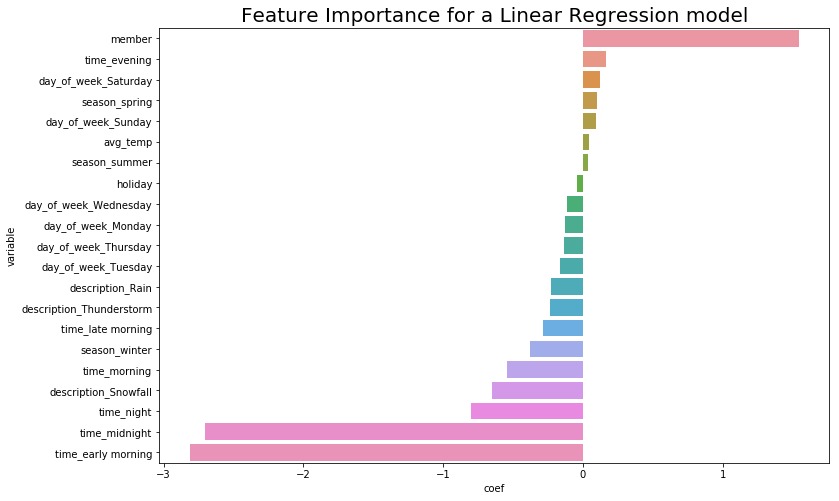

In [52]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( 'coef','variable',ax=ax,data=lr_coefs).\
set_title('Feature Importance for a Linear Regression model',fontsize=20);

### ElasticNet

In [64]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
optimal_enet.fit(X_train, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.004221668531471525
1.0


....................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   35.8s finished


In [65]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train, y_train, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

[0.69334671 0.68584618 0.70291808 0.69017196 0.69111326 0.69009042
 0.68666635 0.67928925 0.68237268 0.69660828]
0.6898423155918442


In [66]:
enet.fit(X_train, y_train)

ElasticNet(alpha=0.004221668531471525, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [67]:
pred = enet.predict(X_test)

In [68]:
enet.score(X_test, y_test)

0.6927594641123471

In [69]:
enet_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':enet.coef_})

enet_coefs.sort_values('coef', inplace=True, ascending=False)

enet_coefs.head(20)

,variable,coef
0,member,1.522775
16,time_evening,0.239482
4,day_of_week_Saturday,0.157186
5,day_of_week_Sunday,0.123746
9,season_spring,0.068586
2,avg_temp,0.043973
1,holiday,-0.000000
10,season_summer,0.000000
8,day_of_week_Wednesday,-0.020707
3,day_of_week_Monday,-0.044857


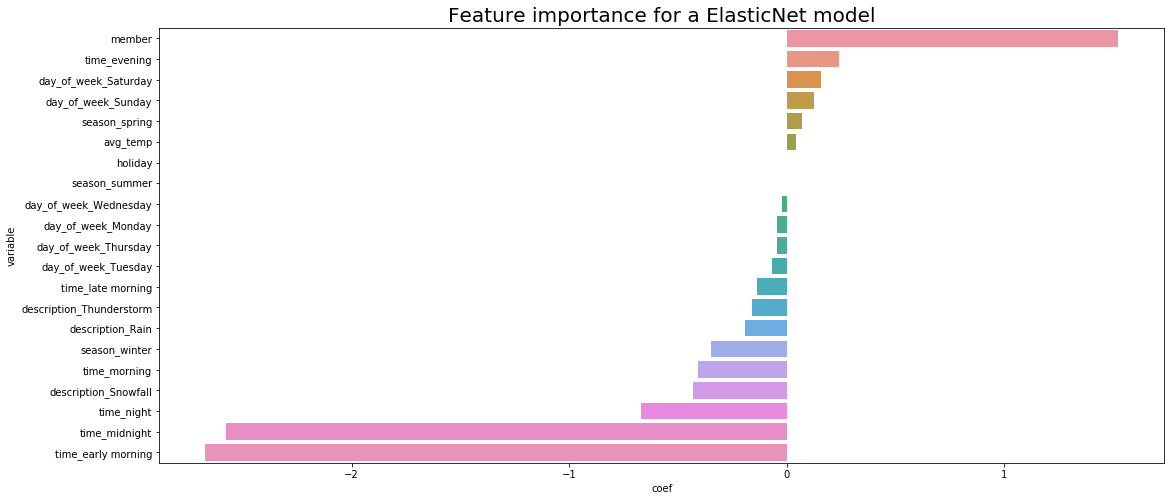

In [70]:
a4_dims = (18, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot('coef','variable',ax=ax,data=enet_coefs).\
set_title('Feature importance for a ElasticNet model', fontsize=20);

### Grid Search on Linear Regression

In [71]:
lm = LinearRegression()

#Next we do cross validation, which splits apart our training data and fits the model on different samples and 
# gives scores for each sample to get the best fit model before we test it on the testing data.

scores = cross_val_score(lm, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print (scores, np.mean(scores), np.std(scores))

[0.6921871  0.69892675 0.69167514 0.68404002 0.69124162] 0.6916141264481273 0.004718312871868244


In [72]:
#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(lm, X_test, y_test, cv = 5)     
#y_test is needed here in predictions to get scores for each fold of cv

accuracy = r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold
print(accuracy)

0.6935362069927898


In [73]:
#If this is good, continue to fit the model on the data
lm.fit(X_train, y_train)

y_hat = lm.predict(X_test)      #this gives me my predictions

lm.score(X_test, y_test)     #this tells me my model performance

0.6938266850260646

In [74]:
lm.score(X_train, y_train)

0.691970313241905

### Random Forest Regressor

In [26]:
rf = RandomForestRegressor(max_depth = 4, 
                           random_state= 0)   

In [27]:
rf.fit(X_train, y_train)

C:\Users\anita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
rf_prediction = rf.predict(X_test)

In [29]:
rf.score(X_test, y_test)
#test score

0.6808158756656517

In [30]:
rf.score(X_train, y_train)
#train score

0.6773408182771664

### Randomised Grid Search

In [57]:
grid = {
    'bootstrap': [True],
    'max_features': [10,20,30],
    'n_estimators': [100, 200, 300, 1000]
}

In [71]:
rf2 = RandomForestRegressor()
random_rf = RandomizedSearchCV(estimator=rf2, param_distributions=grid,
                              random_state=42, n_iter=5, cv = 3, verbose=2, n_jobs = -1)

In [72]:
random_rf.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   32.4s remaining:   28.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   56.9s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'bootstrap': [True], 'max_depth': [3, 4, 5, 6], 'max_features': [10, 20, 30], 'min_samples_leaf': [2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5], 'n_estimators': [100, 200, 300, 1000]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [73]:
best_random_search = random_rf.best_estimator_

In [84]:
estimator = random_rf.estimator

In [74]:
best_count_prediction = best_random_search.predict(X_test)

In [75]:
print(best_random_search.score(X_test, y_test))
print(best_random_search.score(X_train, y_train))

0.7121045392596744
0.7094529327586322


In [76]:
features = pd.DataFrame({'feature': list(X_train.columns),
                       'importance': best_random_search.feature_importances_}).\
                            sort_values('importance', ascending = False)
features

,feature,importance
22,time_midnight,0.312481
0,member,0.247163
19,time_early morning,0.206384
2,avg_temp,0.063250
20,time_evening,0.052377
13,season_winter,0.041332
18,time_afternoon,0.032395
23,time_morning,0.009429
6,day_of_week_Sunday,0.007995
12,season_summer,0.007355


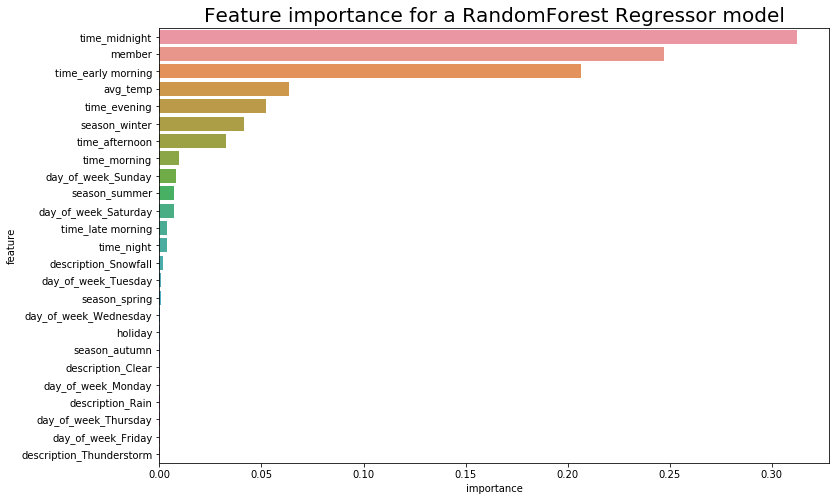

In [77]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( 'importance','feature',ax=ax,data=features).\
set_title('Feature importance for a RandomForest Regressor model', fontsize=20);
#How to interpret the feature importance here?

## Summary of Train and Test scores

In [182]:
# Multiple Linear Regression
print('LR training score:',lr.score(X_train, y_train))
print('LR testing score:',lr.score(X_test, y_test))

LR training score: 0.691970313241905
LR testing score: 0.6938266850260646


In [181]:
#Multiple Linear Regression with ELasticNet Regularisation
print('ElasticNet train score:', enet.score(X_train, y_train))
print('ElasticNet test score:', enet.score(X_test, y_test))

ElasticNet train score: 0.6901690136902858
ElasticNet test score: 0.6927594641123471


In [169]:
#GridSearch on Multiple Linear Regression
print('GridSearch train LinReg score:', lm.score(X_train, y_train))
print('GridSearch test LinReg score:', lm.score(X_test, y_test))

GridSearch train LinReg score: 0.691970313241905
GridSearch test LinReg score: 0.6938266850260646


In [170]:
#Random Forest Model
print('RandomForest train score:', rf.score(X_train, y_train))
print('RandomForest test score:',rf.score(X_test, y_test))

RandomForest train score: 0.6773408182771664
RandomForest test score: 0.6808158756656516


In [78]:
#Randomised Hyperparameters tuning for Random Forest model
print('RanomisedSearch RandomForest train score:',best_random_search.score(X_train, y_train))
print('RanomisedSearch RandomForest test score:', best_random_search.score(X_test, y_test))

RanomisedSearch RandomForest train score: 0.7094529327586322
RanomisedSearch RandomForest test score: 0.7121045392596744
